# Random Forest from Scrtach

# 1- Importing key Modules

In [1]:
# support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function
import warnings
warnings.filterwarnings('ignore')

In [2]:
import string
import math
import numpy as np
import pandas as pd
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [3]:
#imports from helper code file 
import rf_algorithm
from rf_algorithm import random_forest
from rf_algorithm import test_split
from rf_algorithm import build_tree
from rf_algorithm import predict
from rf_algorithm import accuracy_metric
from rf_algorithm import evaluate_algorithm

# 2- Loading data

In [4]:
data=pd.read_excel('clean_3655_eng.xlsx')
data=data.rename(columns={'Unnamed: 0':'random_columns'})
data=data.dropna()
data.shape

(3200, 5)

# 3- Model 

using custom code

In [6]:
#using random forest function from helper code
from rf_algorithm import random_forest
from rf_algorithm import test_split
from rf_algorithm import build_tree
from rf_algorithm import predict
from rf_algorithm import accuracy_metric
from rf_algorithm import evaluate_algorithm
data['category_id'] = data['dep'].factorize()[0]
category_id_df = data[['dep', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'dep']].values)
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))
train = tfidf.fit_transform(data.clean).toarray()
labels = data['dep'].astype(str)
x_train, x_test, y_train, y_test = train_test_split(train, labels, random_state=42,test_size=0.33)
random_forest_model = random_forest()
random_frest_model.fit(x_train, y_train)
y_pred = random_forest_model.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.5804924242424242


# 4-using sklearn

In [7]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))
train = tfidf.fit_transform(df.clean).toarray()
labels = df['dep']
x_train, x_test, y_train, y_test = train_test_split(train, labels, random_state=42,test_size=0.33)
sklearn_clf = RandomForestClassifier()
sklearn_clf.fit(x_train, y_train)
y_pred = sklearn_clf.predict(x_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
accuracy = acc(false_positive_rate, true_positive_rate)
print(accuracy)

0.5931816928084144


# 5- Model Parametrization


### N_estimators
n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot.

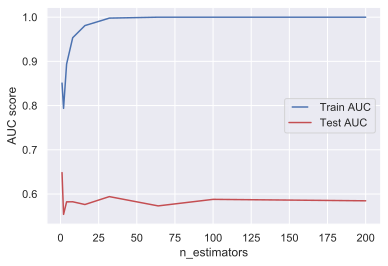

In [8]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Evaluation score')
plt.xlabel('n_estimators')
plt.show()

We can see that for our data, we can stop at 32 trees as increasing the number of trees decreases the test performance.

### max_depth
max_depth represents the depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data. We fit each decision tree with depths ranging from 1 to 32 and plot the training and test errors.

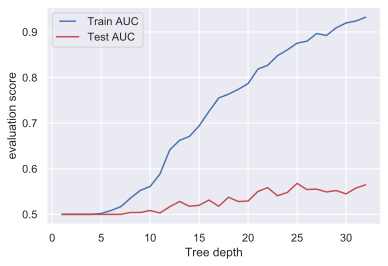

In [9]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('evaluation score')
plt.xlabel('Tree depth')
plt.show()

We see that our model overfits for large depth values i.e above 5. The trees perfectly predicts all of the train data, however, it fails to generalize the findings for new data i.e unseen data

### min_samples_split
min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, each tree in the forest becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples

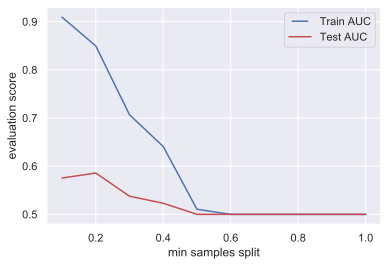

In [10]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split=min_samples_split)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('evaluation score')
plt.xlabel('min samples split')
plt.show()

We can clearly see that when we require all of the samples at each node, the model cannot learn enough about the data.That minimum sample split point is roughly 0.6. This is an underfitting case.

### min_samples_leaf
min_samples_leaf is The minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree.

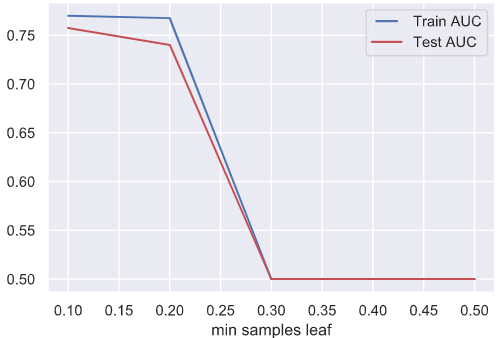

In [32]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.show()

Same conclusion as to previous parameter. We get highest accuracy for training at 0.20 and after that it starts falling. At same point i.e 0.20 we get highest accuracy value for test set however it is lower than train data. so, test data in terms of learning rate is again lower. 

### max_features
max_features represents the number of features to consider when looking for the best split.

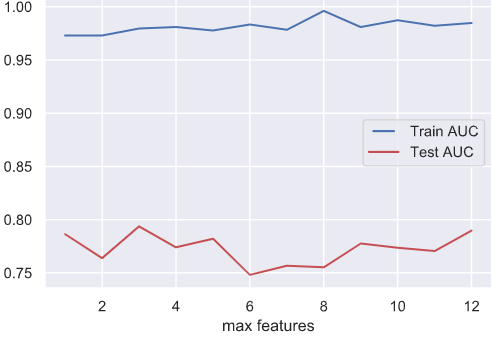

In [33]:
max_features = list(range(1,train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    rf = RandomForestClassifier(max_features=max_feature)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Evaluation score')
plt.xlabel('max features')
plt.show()

This is also an overfitting case at a higher level. It’s unexpected to get overfitting for all values of max_features. However, according to sklearn documentation for random forest, the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.

# Concluding remarks:
    
Our random forest model is overfitting i.e our training model has a better learning rate. When we apply this trained model to unseen data / test data then it does not do very well to generalize.

another difficulty is that we are using a model that is ideal for linear pattern datasets as per literature however; it does not understand text which is a sequential data . Hence, recurrent neural network could be better model to deal with such problems.